### Final Team Project: Predicting Employee Turnover
#### Authors: Lai Ieng Chan, Kyle Esteban Dalope, Mendelina Renee Lopez

In [1]:
# Importing all packages and libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as inf
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# For Decision Trees
import statsmodels.tools.tools as stattools 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# For Logistic Regression model
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from scipy import stats

# For Partitioning the data
from sklearn.model_selection import train_test_split
import random

# For Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# For Random Forest
from sklearn.ensemble import RandomForestClassifier

### Data Importing and Preprocessing

In [2]:
EmployeeData = pd.read_csv(r"C:\Users\mendi\Desktop\USD Class Files\ADS 502\Employee Data.csv")
EmployeeData.head(5)

,Gender,Satisfaction,Business Travel,Department,EducationField,Salary,Home-Office,Attrition
0,Female,High,Rare,Sales,Engineering,Medium,Near,Yes
1,Male,Low,Frequent,Sales,Engineering,Low,Near,Yes
2,Male,Medium,Rare,R&D,Other,Medium,Far,No
3,Female,Low,Frequent,R&D,Engineering,Medium,Far,Yes
4,Male,Medium,Rare,R&D,Medical,Medium,Far,No


In [3]:
# Dataframe Dimension
EmployeeData.shape

(100, 8)

In [4]:
# Descriptive statistics on the dataset
EmployeeData.describe()

,Gender,Satisfaction,Business Travel,Department,EducationField,Salary,Home-Office,Attrition
count,100,100,100,100,100,100,100,100
unique,2,3,3,2,5,3,2,2
top,Male,High,Rare,R&D,Engineering,High,Near,No
freq,65,47,76,71,44,42,67,82


In [5]:
# Checking the data type for each variable
EmployeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
Gender             100 non-null object
Satisfaction       100 non-null object
Business Travel    100 non-null object
Department         100 non-null object
EducationField     100 non-null object
Salary             100 non-null object
Home-Office        100 non-null object
Attrition          100 non-null object
dtypes: object(8)
memory usage: 6.3+ KB


### Exploratory Data Analysis

#### Variable: Employee Satisfaction

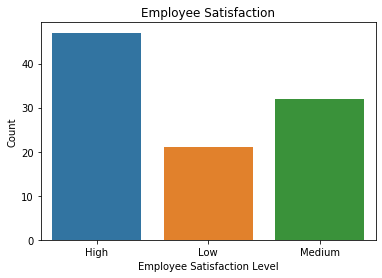

In [6]:
# Bar graph of employee satisfaction
sns.countplot(x='Satisfaction',data=EmployeeData)
plt.xlabel("Employee Satisfaction Level")
plt.ylabel("Count")
plt.title("Employee Satisfaction")
plt.show()

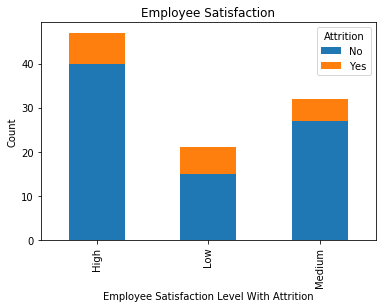

In [7]:
# Bar graph of employee satisfaction with overlay of attrition
crosstab2 = pd.crosstab(EmployeeData['Satisfaction'],EmployeeData['Attrition'])
crosstab2.plot(kind='bar',stacked=True)
plt.xlabel("Employee Satisfaction Level With Attrition")
plt.ylabel("Count")
plt.title("Employee Satisfaction")
plt.show()

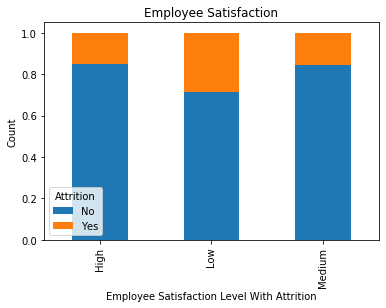

In [8]:
# Normalized Bar graph of employee satisfaction with overlay of attrition
ctn2 = crosstab2.div(crosstab2.sum(1),axis=0)
ctn2.plot(kind='bar',stacked=True)
plt.xlabel("Employee Satisfaction Level With Attrition")
plt.ylabel("Count")
plt.title("Employee Satisfaction")
plt.show()

**Initial Finding: Normalizing employee satisfaction by our taget (attrition) helps us conclude the preliminary findings that the lower the employee satisfaction rate, the higher the attrition rate. It is also important to note that, there are more employees who have high satisfaction level to the company.**

#### Variable: Employee Salary

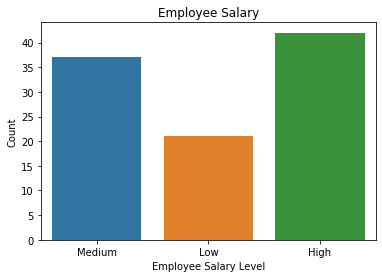

In [9]:
# Bar graph of employee salary
sns.countplot(x='Salary',data=EmployeeData)
plt.xlabel("Employee Salary Level")
plt.ylabel("Count")
plt.title("Employee Salary")
plt.show()

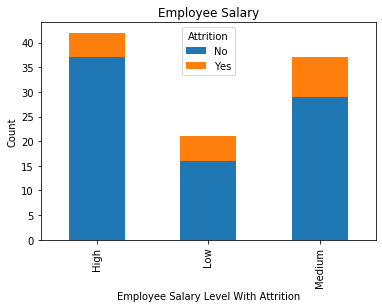

In [10]:
# Bar graph of employee salary with overlay of attrition
crosstab6 = pd.crosstab(EmployeeData['Salary'],EmployeeData['Attrition'])
crosstab6.plot(kind='bar',stacked=True)
plt.xlabel("Employee Salary Level With Attrition")
plt.ylabel("Count")
plt.title("Employee Salary")
plt.show()

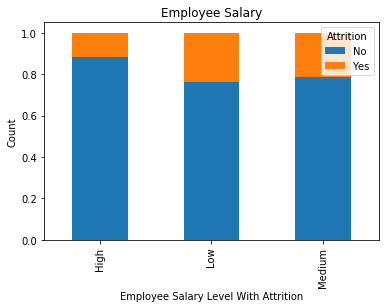

In [11]:
# Normalized Bar graph of employee salary with overlay of attrition
ctn6 = crosstab6.div(crosstab6.sum(1),axis=0)
ctn6.plot(kind='bar',stacked=True)
plt.xlabel("Employee Salary Level With Attrition")
plt.ylabel("Count")
plt.title("Employee Salary")
plt.show()

**Initial Finding: It is apparent that those with lower salary have a higher attrition rate. Furthermore, those with higher salaries had a lower rate of attrition.**

#### Variable: Home-Office

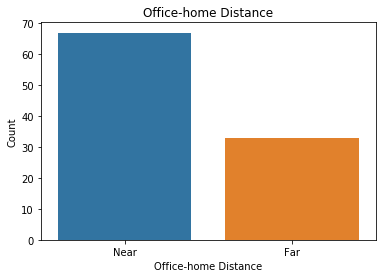

In [12]:
# Bar graph of office-home distance
sns.countplot(x='Home-Office',data=EmployeeData)
plt.xlabel("Office-home Distance")
plt.ylabel("Count")
plt.title("Office-home Distance")
plt.show()

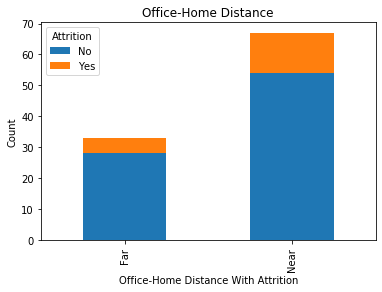

In [13]:
# Bar graph of office-home distance with overlay of attrition
crosstab7 = pd.crosstab(EmployeeData['Home-Office'],EmployeeData['Attrition'])
crosstab7.plot(kind='bar',stacked=True)
plt.xlabel("Office-Home Distance With Attrition")
plt.ylabel("Count")
plt.title("Office-Home Distance")
plt.show()

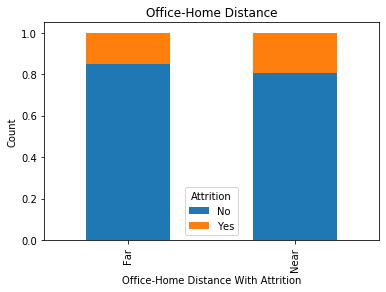

In [14]:
# Normalized Bar graph of office-home distance with overlay of attrition
ctn7 = crosstab7.div(crosstab7.sum(1),axis=0)
ctn7.plot(kind='bar',stacked=True)
plt.xlabel("Office-Home Distance With Attrition")
plt.ylabel("Count")
plt.title("Office-Home Distance")
plt.show()

**Initial Finding: Normalizing home-office distance by our taget (attrition) helps us conclude the preliminary findings that those living closer to their job have a higher rate of attrition. It is also apparent however, that there is not a great contrast between the level of attrition and whether an individual lived near or far from their work.**

### Data Preparation & Cleaning

#### Checking for missing variables

In [18]:
# Checking for missing values
EmployeeData.isna().sum()

Gender             0
Satisfaction       0
Business Travel    0
Department         0
EducationField     0
Salary             0
Home-Office        0
Attrition          0
dtype: int64

**We can see that there is no missing values in this dataset.**

#### Converting categorical variable to dummy variables

In [6]:
# Creating a dataframe for the data we will be working on
data = pd.DataFrame(EmployeeData)

# Converting categorical variables into dummy variables for the ML models
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
data.head(5)

,Gender,Satisfaction,Business Travel,Department,EducationField,Salary,Home-Office,Attrition
0,0,0,2,1,0,2,1,1
1,1,1,0,1,0,1,1,1
2,1,2,2,0,3,2,0,0
3,0,1,0,0,0,2,0,1
4,1,2,2,0,2,2,0,0


#### Splitting the dataset to training set and test set

In [21]:
# Subset the predictor variables to X
X = data[['Satisfaction','Salary','Home-Office']]

# Subset the response variable to y
y = data[['Attrition']]

In [22]:
# Parition the data set with the test size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

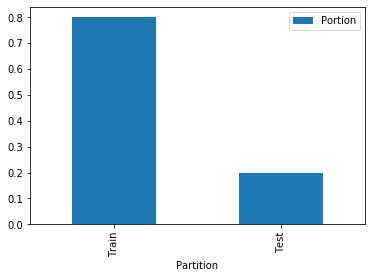

In [23]:
# Collect proportion values in a dataframe
df = pd.DataFrame({'Partition':['Train','Test'],
                  'Portion':[(X_train.shape[0]/X.shape[0]),
                            (X_test.shape[0]/X.shape[0])]
                  })

# Create barplot
df.set_index('Partition').plot(kind='bar')

#### Balancing the target variable (Attrition) in the Training set

In [24]:
# Idnentify the total number of records in the training dataset
print('The total number of records in the training dataset is', y_train.shape[0])

# Identify how many records in the training dataset that has attrition = yes
print('There are', y_train.loc[y_train['Attrition']==1].shape[0], 
      'records in the training dataset that have a attrition class of Yes.')

The total number of records in the training dataset is 80
There are 16 records in the training dataset that have a attrition class of Yes.


**That is about 17.5% of the training dataset with Attrition have the 'Yes' response value. To provide the classification algorithms with a rich selection of records for each category, we will resample the training dataset in order to have 20% of the rebalanced data set have 'yes' attrition values.**\
<br>
**To have 20% of the rebalanced dataset have true churn values, we have p=0.2, records=80, rare=14. By substituting the unknowns into the formula 'Rare + x = p(records + x)', we get x=2.5. That is we need to resample 3 records whose Churn response is 'True' and add them to our training dataset.**\

In [25]:
# Subsetting the records which we want to resample
to_resample_y = y_train.loc[y_train['Attrition'] == 1]

# sample() draws records at random form, replace 'Yes' specifies to sample with replacement
our_resample_y = to_resample_y.sample(n = 3, replace = True)

# Add the resampled records to the original dataset
y_train_rebal = pd.concat([y_train, our_resample_y])

# Confirming that 20% of the records in the rebalanced dataset have 'True' as the Churn values
y_train_rebal['Attrition'].value_counts()

0    64
1    19
Name: Attrition, dtype: int64

**Since 17/(66+17) is ~20%, we can confirm that 20% of the records in the rebalanced data set have 'Yes' in attrition values.**

#### Balancing the response variable (Satisfaction, Salary and Home-Office) in the Training set

In [26]:
# Look for the indices of the resampled y 
our_resample_y.index

Int64Index([1, 96, 51], dtype='int64')

In [27]:
# Grab the same X from indices 26,42,34 from X_Train
to_resample_X = X_train.loc[[1,33,36]]
to_resample_X

,Satisfaction,Salary,Home-Office
1,1,1,1
33,0,2,1
36,1,1,1


In [28]:
# sample() draws records at random form, replace 'Yes' specifies to sample with replacement
our_resample_X = to_resample_X.sample(n = 3, replace = True)

# Add the resampled records to the original dataset
X_train_rebal = pd.concat([X_train, our_resample_X])
X_train_rebal.head()

,Satisfaction,Salary,Home-Office
44,0,0,0
18,0,2,1
67,0,2,0
57,2,1,1
91,0,0,1


### Modeling

#### CART Algorithm

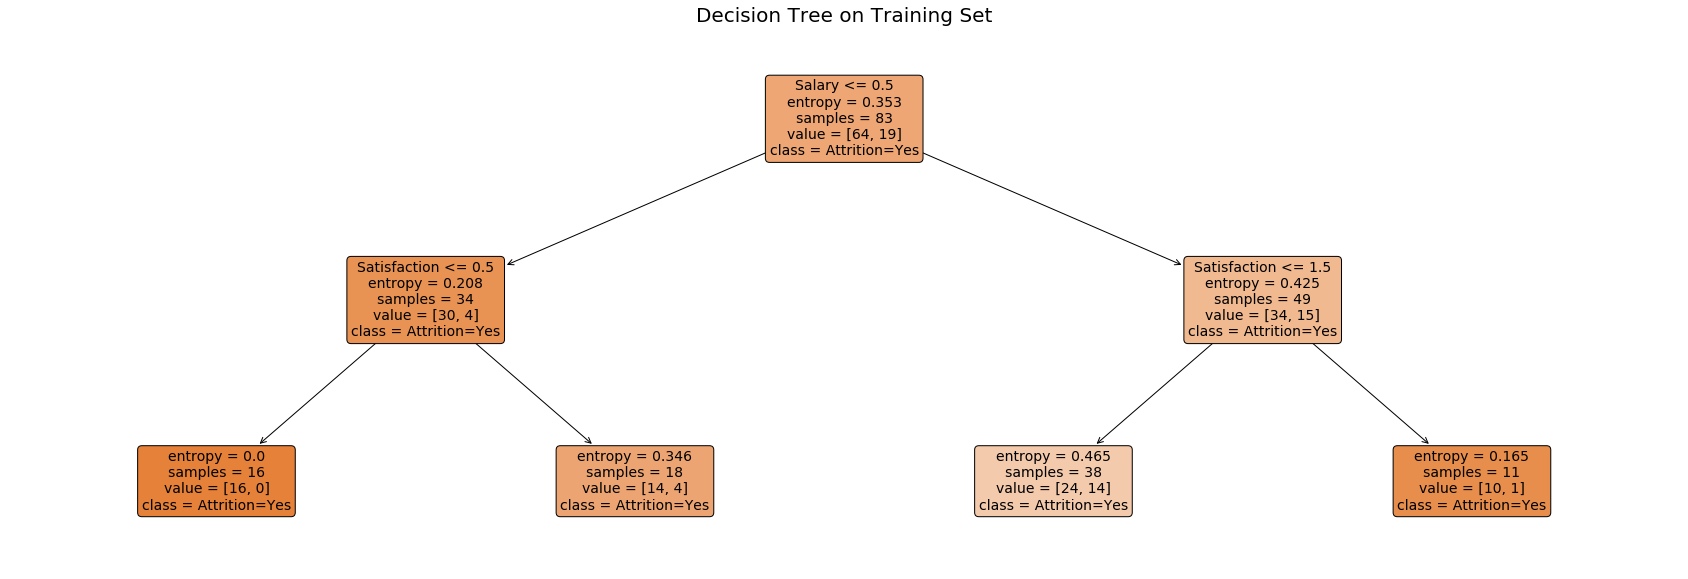

In [29]:
# Train CART model
cart01 = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes=4).fit(X_train_rebal, y_train_rebal)

# Specify the names of each column of X and y
X_names = ['Satisfaction', 'Salary', 'Home-Office']
y_names = ['Attrition=Yes', 'Attrition=No']

# Obtain tree structure with labeles
plt.figure(figsize=(30,10))
cart01_viz = tree.plot_tree(cart01, feature_names = X_names, class_names = y_names,
                            rounded = True, filled = True, fontsize=14)
plt.title("Decision Tree on Training Set", fontsize=20)
plt.show()

**The first split is on the employee salary level at the 0.5 threshold meaning the low salary level. The second split is on employee satisfaction level.**

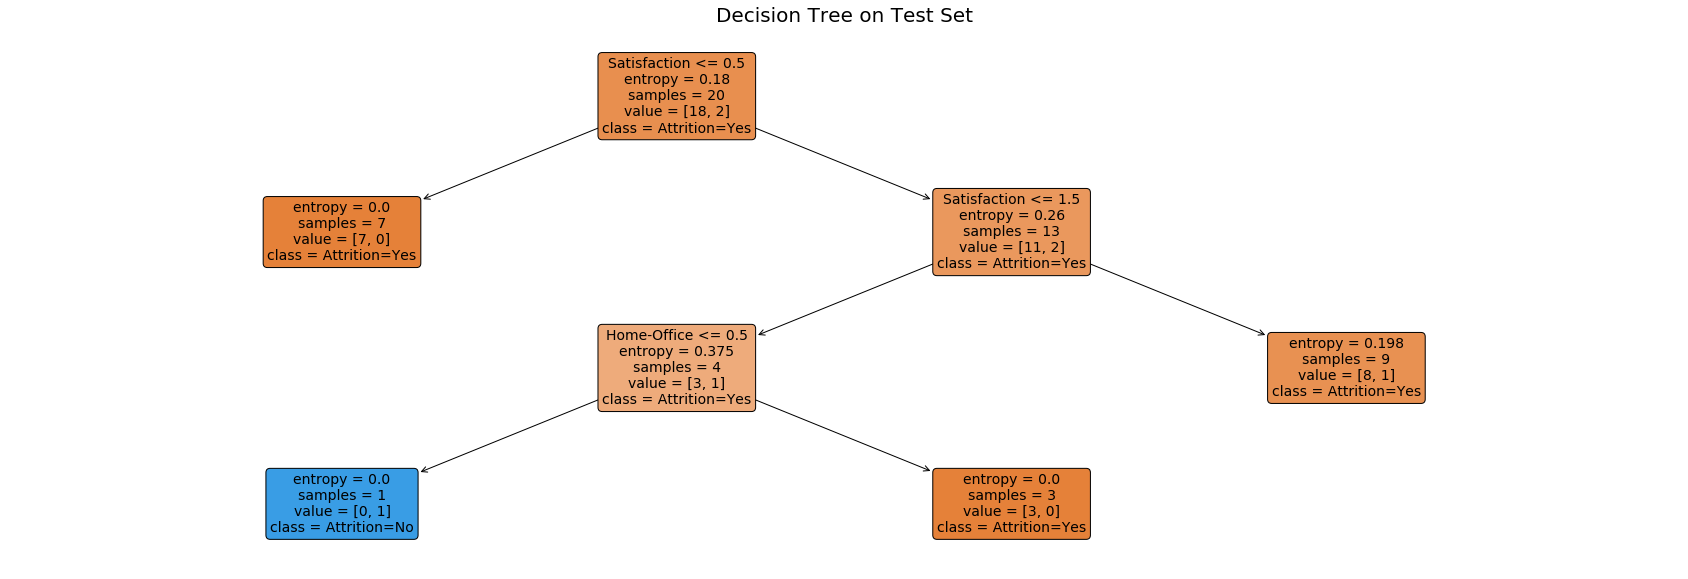

In [30]:
# Use the test dataset to validate the CART model

# Build a C5.0 model with test data set
cart01_test = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes=4).fit(X_test, y_test)

# Specify the names of each column of X and y
X_names = ['Satisfaction', 'Salary', 'Home-Office']
y_names = ['Attrition=Yes', 'Attrition=No']

# Obtain tree structure with labeles
plt.figure(figsize=(30,10))
cart01_test_viz = tree.plot_tree(cart01_test, feature_names = X_names, class_names = y_names,
                            rounded = True, filled = True, fontsize=14)
plt.title("Decision Tree on Test Set", fontsize=20)
plt.show()

#### C5.0 Algorithm

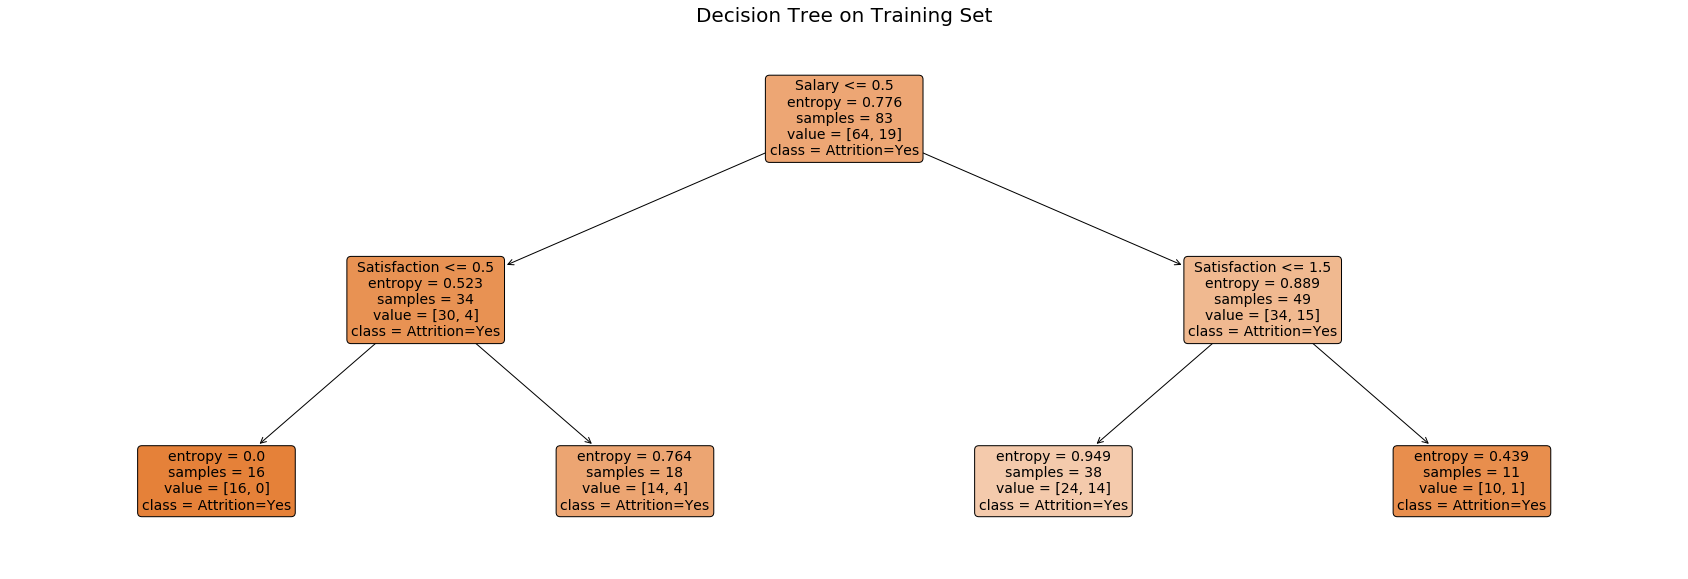

In [31]:
# Train C5.0 Algorithm with test data set
c50 = DecisionTreeClassifier(criterion="entropy", 
                                max_leaf_nodes=4).fit(X_train_rebal, y_train_rebal)

# Visualizing the decision tree
plt.figure(figsize=(30,10))
c50_viz = tree.plot_tree(c50, feature_names = X_names, class_names = y_names,
rounded = True, filled = True, fontsize=14)
plt.title("Decision Tree on Training Set", fontsize=20)
plt.show()

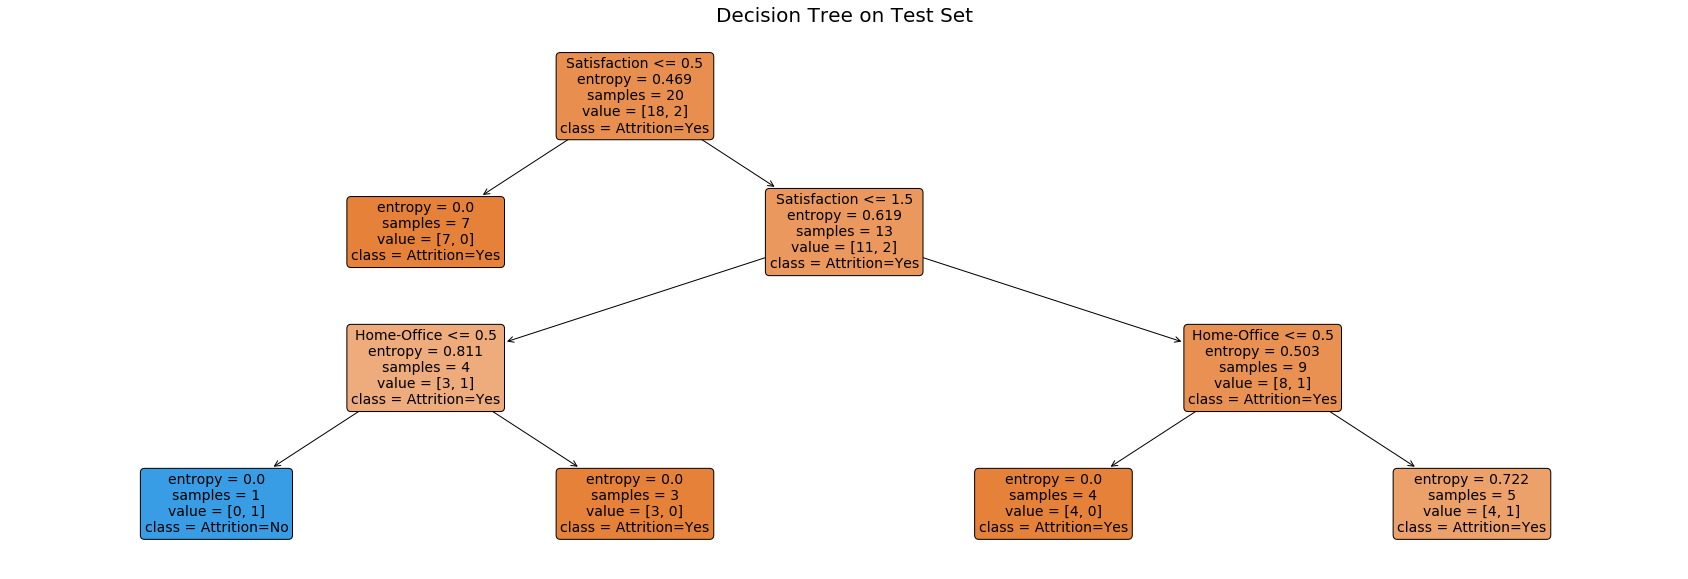

In [32]:
# Use the test dataset to validate the C5.0 model

# Train C5.0 Algorithm
c50_test = DecisionTreeClassifier(criterion="entropy", 
                                max_leaf_nodes=5).fit(X_test, y_test)

# Build a C5.0 model with test data set
plt.figure(figsize=(30,10))
c50_test_viz = tree.plot_tree(c50_test, feature_names = X_names, class_names = y_names,
rounded = True, filled = True, fontsize=14)
plt.title("Decision Tree on Test Set", fontsize=20)
plt.show()

#### Logistic Regression Model

In [33]:
# Running a regression prediction
X = sm.add_constant(X_train)
y = pd.DataFrame(y_train)
logreg01 = sm.Logit(y,X).fit()
logreg01.summary2()

C:\Users\mendi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.484998
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
==============================================================
Model:              Logit            Pseudo R-squared: 0.031  
Dependent Variable: Attrition        AIC:              85.5997
Date:               2022-04-13 21:59 BIC:              95.1278
No. Observations:   80               Log-Likelihood:   -38.800
Df Model:           3                LL-Null:          -40.032
Df Residuals:       76               LLR p-value:      0.48171
Converged:          1.0000           Scale:            1.0000 
No. Iterations:     6.0000                                    
--------------------------------------------------------------
                Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------
const          -2.2016   0.7175 -3.0686 0.0022 -3.6079 -0.7954
Satisfaction    0.1198   0.3376  0.3549 0.7227 -0.5419  0.7816
Salary          0.4607   0.3378  1.3637 0.1726 -0.2014  1.1229
Home-Office     0.3569   0.6448  0.5535 0.5799 -0.9069  1.6206
==============================================================

"""

In [34]:
# Validating the model using the test data set
X_test = sm.add_constant(X_test)
y_test = pd.DataFrame(y_test)
logreg01_test = sm.Logit(y_test, X_test).fit()
logreg01_test.summary2()

Optimization terminated successfully.
         Current function value: 0.309640
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
==============================================================
Model:              Logit            Pseudo R-squared: 0.048  
Dependent Variable: Attrition        AIC:              20.3856
Date:               2022-04-13 22:02 BIC:              24.3685
No. Observations:   20               Log-Likelihood:   -6.1928
Df Model:           3                LL-Null:          -6.5017
Df Residuals:       16               LLR p-value:      0.89237
Converged:          1.0000           Scale:            1.0000 
No. Iterations:     7.0000                                    
--------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
--------------------------------------------------------------
const           -2.7293   2.1301 -1.2813 0.2001 -6.9042 1.4457
Satisfaction     0.6015   1.0042  0.5990 0.5492 -1.3666 2.5696
Salary           0.0985   0.8491  0.1160 0.9076 -1.5657 1.7628
Home-Office     -0.5930   1.5826 -0.3747 0.7079 -3.6949 2.5089
==============================================================

"""

**The estimated Attrition equals negative 2.2016 plus 0.1198 times the Employee satisfaction plus 0.4607 times Salary plus 0.3569 times the Home to Office.**

#### Naive Bayes Classifier

In [35]:
#Running the Naive Bayes classifier on Attrition based on Satisfaction, Salary, and Home-Office
X_Satis_ind = np.array(X_train['Satisfaction'])
(X_Satis_ind,X_Satis_ind_dict)=stattools.categorical(X_Satis_ind,drop=True,
                                                     dictnames=True)
X_Satis_ind = pd.DataFrame(X_Satis_ind)
X_Salary_ind = np.array(X_train['Salary'])
(X_Salary_ind,X_Salary_ind_dict)=stattools.categorical(X_Salary_ind, 
                                                       drop=True,dictnames=True)
X_Salary_ind = pd.DataFrame(X_Salary_ind)
X_HO_ind = np.array(X_train['Home-Office'])
(X_HO_ind,X_HO_ind_dict)=stattools.categorical(X_HO_ind,drop=True,
                                               dictnames=True)
X_HO_ind = pd.DataFrame(X_HO_ind)

X = pd.concat((X_Satis_ind,X_Salary_ind,X_HO_ind),axis = 1)
Y = y_train['Attrition']
nb_01 = MultinomialNB().fit(X,Y)

In [65]:
# Evaluating the Naive Bayes model on the test data set
X_Satis_ind_test = np.array(X_test['Satisfaction'])
(X_Satis_ind_test,X_Satis_ind_dict_test)=stattools.categorical(X_Satis_ind_test,
                                                               drop=True,dictnames=True)
X_Satis_ind_test=pd.DataFrame(X_Satis_ind_test)
X_Salary_ind_test = np.array(X_test['Salary'])
(X_Salary_ind_test,X_Salary_ind_dict_test)=stattools.categorical(X_Salary_ind_test,
                                                            drop=True,dictnames=True)
X_Salary_ind_test=pd.DataFrame(X_Salary_ind_test)
X_HO_ind_test = np.array(X_test['Home-Office'])
(X_HO_ind_test,X_HO_ind_dict_test)=stattools.categorical(X_HO_ind_test,
                                                         drop=True,dictnames=True)
X_HO_ind_test = pd.DataFrame(X_HO_ind_test)

X_testing = pd.concat((X_Satis_ind_test,X_Salary_ind_test,X_HO_ind_test),axis=1)
Y_predicted = nb_01.predict(X_testing)
ypred = pd.crosstab(y_test['Attrition'],Y_predicted,rownames=['Actual'],colnames = ['Predicted'])
ypred['Total']=ypred.sum(axis=1);ypred.loc['Total']=ypred.sum();ypred

Predicted,0,Total
Actual,,
0,17,17
1,3,3
Total,20,20


In [69]:
%time MultinomialNB().fit(X_train_rebal,y_train_rebal)

Wall time: 26.9 ms


C:\Users\mendi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [70]:
#Calculating the accuracy of the predictions
ypred=nb_01.predict(X_testing)
metrics.accuracy_score(y_test,ypred)

0.85

In [71]:
metrics.confusion_matrix(y_test,ypred)

array([[17,  0],
       [ 3,  0]], dtype=int64)

#### Confusion Matrix
[TN FP

 FN TP]

#### Random Forest Classifier

In [37]:
# Random Forest requires a response variable formatted as a one-dimensional
# array, so that we use numpy's ravel() command to create that format
rfy = np.ravel(y_train_rebal)
rfy

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [38]:
# Use the RandomForestClassifier() command to create the random forest
rf01 = RandomForestClassifier(n_estimators = 100, criterion = "gini").fit(X_train_rebal,rfy)
# n_estimators input specifies the number of trees to be built

In [39]:
# To review the classification made on training data set
rf_train = rf01.predict(X_train_rebal)
rf_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [40]:
rf_train = pd.DataFrame(rf_train)
rf_train[0].value_counts()/len(rf_train)

0    0.891566
1    0.108434
Name: 0, dtype: float64

In [41]:
# Validate the model using the test data set. 

# Random Forest requires a response variable formatted as a one-dimensional
# array, so that we use numpy's ravel() command to create that format
rfy_test = np.ravel(y_test)
rfy_test

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [42]:
# Use the RandomForestClassifier() command to create the random forest
rf01_test = RandomForestClassifier(n_estimators = 100, criterion = "gini").fit(X_test,rfy_test)
# n_estimators input specifies the number of trees to be built

In [43]:
# To review the classification made on test data set
rf_test = rf01_test.predict(X_test)
rf_test

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [45]:
rf_test = pd.DataFrame(rf_test)
rf_test[0].value_counts()/len(rf_test)

0    0.9
1    0.1
Name: 0, dtype: float64

**Both models classify the data as ~85-89% as no attrition and ~15-10% as yes attrition.**

### Notes/May Not include

In [ ]:
X['EducationField'].value_counts(normalize=True) * 100

In [ ]:
# Bar graph of gender
sns.countplot(x='Gender', data=EmployeeData)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Count")
plt.show()

In [ ]:
# Bar graph of gender with overlay of attrition
crosstab1 = pd.crosstab(EmployeeData['Gender'],EmployeeData['Attrition'])
crosstab1.plot(kind='bar',stacked=True)
plt.xlabel("Gender With Attrition")
plt.ylabel("Count")
plt.title("Gender Count With Attrition Overlay")
plt.show()

In [ ]:
sns.countplot(x='Department',data=EmployeeData)

In [ ]:
crosstab4 = pd.crosstab(EmployeeData['Department'],EmployeeData['Attrition'])
crosstab4.plot(kind='bar',stacked=True)

In [ ]:
ctn4 = crosstab4.div(crosstab4.sum(1),axis=0)
ctn4.plot(kind='bar',stacked=True)

In [ ]:
sns.countplot(x='EducationField',data=EmployeeData)

In [ ]:
crosstab5 = pd.crosstab(EmployeeData['EducationField'],EmployeeData['Attrition'])
crosstab5.plot(kind='bar',stacked=True)

In [ ]:
ctn5 = crosstab5.div(crosstab5.sum(1),axis=0)
ctn5.plot(kind='bar',stacked=True)

In [ ]:
#### Multicollinearity Analysis
# Identify Multicollinearity
# Subseting the three predictor variables and put them in their own data frame
X = pd.DataFrame(EmployeeData[['Salary', 'Satisfaction', 'Home-Office']])
X = sm.add_constant(X)

# Run the variance_inflation_factor() command as given below to obtain the VIF values
[inf.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [ ]:
X_names = ['Cap_Gains_Losses', 'Divorced', 'Married', 'Never-married', 'Separated', 'Widowed']
y_names = ['<=50K', '>50K']

c. Data preparation/cleaning

        1) Missing variables
        
        2) Outliers
        
        3) Correlation Analysis
        
        4) Multicollinearity Analysis (If strong multicollinearity exist, apply PCA)
        
        5) Balancing the train dataset
        
        6) Splitting the data